## A1.5 Solución de problemas

**1. Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola el tipo de dato de cada variable del data frame.**

In [126]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar los datos del archivo A1.3 NASA.csv
data = pd.read_csv('A1.5 Calificaciones.csv')

# Imprimir las variables del dataframe
print("Variables del dataframe:\n", data.dtypes)

Variables del dataframe:
 Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


**2. Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple. Presta especial atención a variables que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los números representan una clase). Imprime las primeras 5 observaciones de la base de datos modificada, demostrando que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas.**

In [127]:
# 2. Transformar variables categóricas en numéricas usando pd.get_dummies y concat
dummy_escuela = pd.get_dummies(data["Escuela"], prefix="Escuela", drop_first=True)
dummy_sexo = pd.get_dummies(data["Sexo"], prefix="Sexo", drop_first=True)
dummy_internet = pd.get_dummies(data["Internet"], prefix="Internet", drop_first=True)

# Concatenar las variables dummies con el dataframe original
data = pd.concat([data, dummy_escuela, dummy_sexo, dummy_internet], axis=1)

# Eliminar las columnas originales categóricas
data.drop(columns=["Escuela", "Sexo", "Internet"], inplace=True)

# Mostrar las primeras 5 observaciones
print("\nPrimeras 5 observaciones del dataframe:\n", data.head())


Primeras 5 observaciones del dataframe:
    Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  
0         False  
1          True  
2          True  
3          True  
4         False  


**3. Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3. Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las características de dichas observaciones, agrega una línea de texto que describa qué planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de ser necesario.**


In [128]:
Q1 = data["Faltas"].quantile(0.25)
Q3 = data["Faltas"].quantile(0.75)
IQR = Q3 - Q1
k = 3
lower_bound = Q1 - k*IQR
upper_bound = Q3 + k*IQR

outliers = data[(data["Faltas"] < lower_bound) | (data["Faltas"] > upper_bound)]
print("\nObservaciones atípicas para la variable 'Faltas':\n", outliers)


Observaciones atípicas para la variable 'Faltas':
      Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
74     16               2           0      54  11  12  11       False   False   
183    17               2           0      56   9   9   8       False   False   
276    18               2           0      75  10   9   9       False   False   
307    19               1           1      38   8   9   8       False    True   
315    19               3           1      40  13  11  11       False   False   

     Internet_yes  
74           True  
183          True  
276          True  
307          True  
315          True  


Se identificaron estudiantes con un número de faltas extremadamente alto (hasta 75 ausencias), lo que podría sesgar el análisis. Estos valores pueden deberse a situaciones excepcionales, como abandono escolar o errores en la captura de datos. A mi consideración, probablemente sean errores en la captura de datos o casos que no contribuyen al objetivo del modelo de predecir el desempeño académico de los estudiantes, ya que podrían sesgar el análisis. Por lo tanto, se procederá a eliminar los outliers.

In [129]:
# Eliminación de outliers
data = data[(data["Faltas"] >= lower_bound) & (data["Faltas"] <= upper_bound)]

**4. Genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados. Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento en una línea de texto. Realiza la acción descrita en caso de ser necesario.**

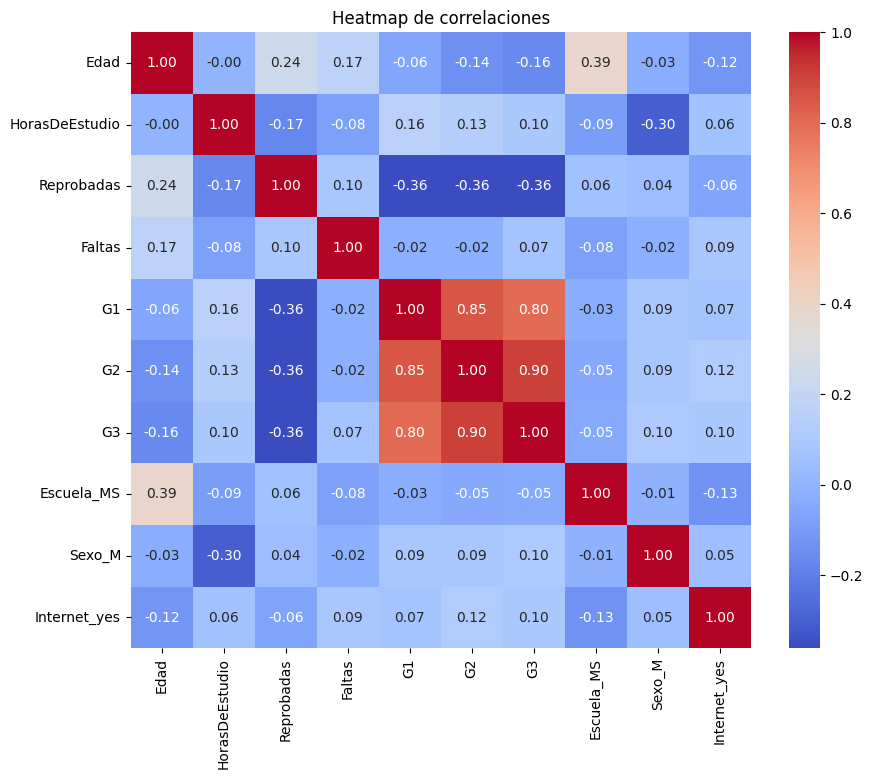

In [130]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de correlaciones")
plt.show()

Observando la matriz de correlaciones, se aprecia una fuerte relación entre las calificaciones G1, G2 y G3 (correlaciones > 0.80). Esto indica un problema de colinealidad, lo que puede afectar la estabilidad del modelo de regresión al generar coeficientes poco confiables.

Para reducir la colinealidad sin perder demasiada información, se puede eliminar una de las variables G1 o G2, ya que ambas están altamente correlacionadas con G3, la cual es la variable idnependiente. Entonces se va a conservar la calificación final (G3) y una de las anteriores (G2, ya que tiene más relación con G3) para evitar redundancias en el modelo.

In [131]:
# Eliminar la variable G1 por colinealidad
data.drop(columns=["G1"], inplace=True)

**5. Incluye términos de interacción para al menos dos pares de variables, las que te llame más la atención analizar con esta metodología. Trata de evitar incluir interacciones para todos los pares de variables posibles. Imprime en consola las primeras 5 observaciones de la base de datos con los nuevos términos.**

In [132]:
#  Incluir términos de interacción
data["Faltas_Reprobadas_interaction"] = data["Faltas"] * data["Reprobadas"]
data["Estudio_Internet_interaction"] = data["HorasDeEstudio"] * data["Internet_yes"]

# Mostrar las primeras 5 observaciones con términos de interacción
display(data.head())


,Edad,HorasDeEstudio,Reprobadas,Faltas,G2,G3,Escuela_MS,Sexo_M,Internet_yes,Faltas_Reprobadas_interaction,Estudio_Internet_interaction
0,18,2,0,6,6,6,False,False,False,0,0
1,17,2,0,4,5,6,False,False,True,0,2
2,15,2,3,10,8,10,False,False,True,30,2
3,15,3,0,2,14,15,False,False,True,0,3
4,16,2,0,4,10,10,False,False,False,0,0


**6. Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que corresponda al 80% de los datos totales e imprime en consola un resumen de los resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final del 20% de las observaciones que no se usaron para entrenar. Genera una gráfica de dispersión de las calificaciones finales reales contra las calificaciones finales estimadas por el modelo en los datos de prueba. Agrega una línea de texto donde des una conclusión sobre los resultados del modelo, con base en la información que se muestra en la gráfica.**

In [133]:
# Separar las variables independientes y dependiente
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x = data.drop(columns=["G3"])
y = data["G3"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Asegúrate de que todas las columnas en x_train sean numéricas
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])

# Ajustar el modelo con statsmodels
model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
x_test = sm.add_constant(x_test)

# Imprimir el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 10 Feb 2025   Prob (F-statistic):          1.74e-114
Time:                        01:24:01   Log-Likelihood:                -640.04
No. Observations:                 312   AIC:                             1296.
Df Residuals:                     304   BIC:                             1326.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

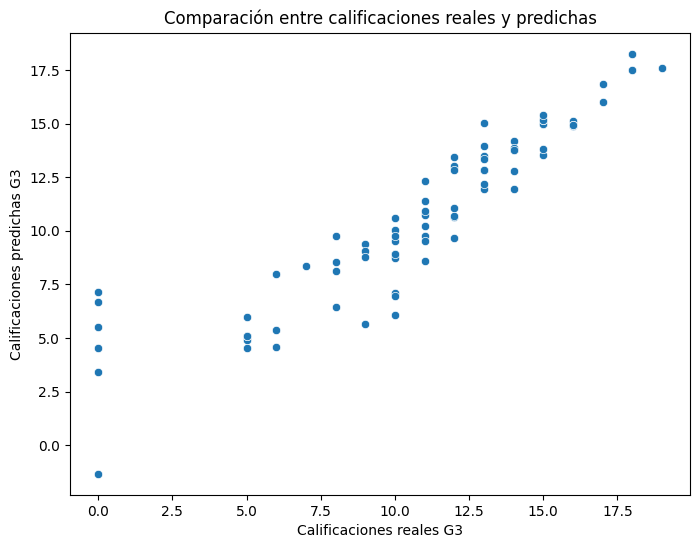

In [134]:
# Predicción sobre datos de prueba
y_pred = model.predict(x_test)

# Gráfica de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Calificaciones reales G3")
plt.ylabel("Calificaciones predichas G3")
plt.title("Comparación entre calificaciones reales y predichas")
plt.show()

El modelo es relativamente bueno segun su R cuadrada y se puede observar en la grafica que para las calificaciones desde 5 putnos hace predicciones cercanas a las reales. Sin embargo, este modelo tiene mucho que mejorar, ya que varias de las variables no son significantes debido a su p-value alto como horas de estuidio, edad y sobretodo la interaccion entre internet y horas de estudio

**Firma de honor:**  "Doy mi palabra que he realizado esta actividad con integridad académica" - Daniel Matthieu Potes Lesoinne #584678